<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# News Article Classification


Today, you are a machine learning engineer at [Upday](https://www.upday.com/home), a news app. The engine behind the app processes almost 100k news articles every day in many languages and context. In order to connect people with the right content, we need to know what the articles are about. 

The job here is to build a classifier that identify the category of an article accurately that will be fed into the recommendation algorithms of the app for better personalized content for the readers. 

You will first train a Transformer from scratch; then fine-tune a pre-trained Transformer model for text classification using 🤗; and compare performances using the same test data set.

## Learning objectives


By the end of this session, you will be able to:
- Understand how Transformer models work
- Build a Transformer model for text classification from scratch
- Fine-tune a pre-trained Transformer model for text classification using 🤗 

# Task 1. Prepare the data

1. [20 news groups data](http://qwone.com/~jason/20Newsgroups/) is one of the standard datasets in the `scikit-learn`. The 20 newsgroups dataset comprises around 18k newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the two datasets is based upon messages posted before and after a specific date.

    Take a read on its [usage](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset) and load the training and testing datasets into `train` and `test` respectively via `fetch_20newsgroups`.

In [1]:
import pandas as pd

In [2]:
NUM_LABELS = 20 #Number of topics to classify the news articles into

In [3]:
from sklearn.datasets import fetch_20newsgroups #sklearn dataset

train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

In [4]:
type(train) # Train data is a container object similar to dictionary

sklearn.utils.Bunch

In [5]:
type(train['data']) # This is how to access the data which is a list of strings

list

In [6]:
pd.DataFrame(train['data']) # train data is a list of strings

,0
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311,From: westes@netcom.com (Will Estes)\nSubject:...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...


In [7]:
train['data'][0] # Sample row from train data 

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [8]:
type(train['target_names']) # target_names is a list also part of the 'bunch' object 

list

In [9]:
train['target_names'] # list of topics 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
train['target'][0] # the sample text is classified as 7 = rec.autos

7

In [11]:
len(train['target']) # approx 11K articles are in train data out of the total of 18K 

11314

In [12]:
train.keys() # check all the elements in train data; 

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

1. Explore the data. For example, what is the data type of `train` and `test`? What is the data type of `train['data']`? What is in `train['target_names']`? 

*   The data type of `train` and `test` is `sklearn.utils.Bunch`. This is a container object similar to a python dictionary. 
*   `train['data']` is a list. Each item in the list is a news article. 
* `train['target_names']` is the list of categories of news articles, i.e. the labels for classifying the articles into. There 20 of them. For e.g. the first article in `train['data']` is classified as 7, which refers to `ref.autos`. 



1. Train / validation / test splits. 

    There are four keys in each data set and we need "data" (the text) and "target" (the category). Extract the "data" and create a `pd.Series` named `X`; and extract the "target" and create a `pd.Series` named `y`. Do the same for the `test` data set, named `X_test` and `y_test`, respectively.

In [13]:
X, y = pd.Series(train['data']), pd.Series(train['target']) # convert the list to pandas Series 
X_test, y_test = pd.Series(test['data']), pd.Series(test['target'])

Now split `X` and `y` into training and validation sets. Use `train_test_split` from `sklearn.model_selection` to split the data; save 10% of the data for validation and set the random state to 19.

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(
    X, # data
    y, # target 
    test_size=0.1, # 10% validation data  
    # random_state is used to seed the random number generator used to split the data. 
    # This ensures that the same split will be obtained every time the script is run with the same random state.
    random_state=19, 
    # stratify is used to ensure that the class distribution in the 
    # target variable is preserved in both train and validation sets.
    stratify=y
)

In [15]:
assert y_train.shape == (10182,)
assert y_valid.shape == (1132,)
assert y_test.shape == (7532,)

In [16]:
pd.DataFrame(X_train.head(5)) # sample rows from data 

,0
3597,From: luriem@alleg.edu The Liberalizer (Michae...
280,From: tammy@uclink.berkeley.edu (Tammy Chen)\n...
7182,From: kbos@carina.unm.edu (K. Mitchell Bose)\n...
2235,From: rbemben@timewarp.prime.com (Rich Bemben)...
5830,From: jcox@x102a.harris-atd.com (Jamie Cox)\nS...


In [17]:
# extract the labels for the sample rows and sanity check! 
index = list(y_train.head(5))
for x in index: 
  print(f"{x}: {train['target_names'][x]}")

9: rec.sport.baseball
6: misc.forsale
9: rec.sport.baseball
8: rec.motorcycles
4: comp.sys.mac.hardware


1. Convert categorical labels into dummy variables. 

    Use `pd.get_dummies` to convert labels into dummy variables for `y_train`, `y_valid`, `y_test`.

In [18]:
# convert the y_train/valid/test variables into one-hot encoded format
y_train = pd.get_dummies(y_train)
y_valid = pd.get_dummies(y_valid)
y_test = pd.get_dummies(y_test)

In [19]:
y_train.head(5) # display the one-hot encoded target variable for the sample rows

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
3597,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7182,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2235,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5830,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
assert y_train.shape == (10182, NUM_LABELS)
assert y_valid.shape == (1132, NUM_LABELS)
assert y_test.shape == (7532, NUM_LABELS)


# Task 2. Attention is all you need

Recently most of the natural language processing tasks are being dominated by the `Transformer` architecture, introduced in [Attention Is All You Need](https://arxiv.org/abs/1706.03762), which used a simple mechanism called `Neural Attention` as one of its building blocks. As the title suggests this architecture didn't require any recurrent layer. We now build a text classification using Attention and Positional Embeddings.

1. Transformer (attention) Block. 

    The concept of `Neural Attention` is fairly simple; i.e., not all input information seen by a model is equally important to the task at hand. Although this concept has been utilized at various different places as well, e.g., max pooling in ConvNets, but the kind of attention we are looking for should be `context aware`.

    The attention mechanism allows output to focus attention on input while producing output while the self-attention model allows inputs to interact with each other; in other words, calculate attention of all other inputs with respect to one input.

    In the paper, the authors proposed another type of attention mechanism called multi-headed attention which refers to the fact that the outer space of the self attention layer gets factored into a set of independent sub-spaces learned separately, where each subspace is called a "head". **You need to implement the multi-head attention layer**, supplying values for two parameters: `num_heads` and `key_dim`.

    There is a learnable dense projection present after the multi-head attention which enables the layer to actually learn something, as opposed to being a purely stateless transformation. **You need to implement `dense_proj`**, use the `tf.keras.Sequential` to stack two dense layers: 
    
        1. first dense layer with `dense_dim` units and activation function `relu`;
        2. second dense layer with `embed_dim` units and no activation function.

In [21]:
from tensorflow.keras import layers as L
import tensorflow as tf
from tensorflow import keras

# Custom transformer block implementation which consists of: 
# (1) Self-attention mechanism with the MultiHeadAttention layer 
# (2) Feed-forward network with 2 dense layers 

class TransformerBlock(L.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        
        # num_heads: The number of attention heads to use in the layer. 
        #            Each attention head computes attention separately and then the results are concatenated.
        # key_dim: The dimension of the keys used in the attention mechanism (=embedding size)
        self.attention = L.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)

        # Feedforward network 
        self.dense_proj = keras.Sequential([
            L.Dense(dense_dim, activation='relu'), 
            L.Dense(embed_dim, activation=None)
        ])

        self.layernorm1 = L.LayerNormalization()
        self.layernorm2 = L.LayerNormalization()
        super().__init__(**kwargs)
    
    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[: tf.newaxis, :]
        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm1(inputs + attention_output) # residual link: 'inputs'
        proj_output = self.dense_proj(proj_input)
        return self.layernorm2(proj_input + proj_output) # residual link: 'proj_input'
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim
        })
        return config

1. Positional embedding. 

    The idea behind Positional Encoding is fairly simple as well: to give the model access to token order information, therefore we are going to add the token's position in the sentence to each word embedding.

    Thus, one input word embedding will have two components: the usual token vector representing the token independent of any specific context, and a position vector representing the position of the token in the current sequence.

In [22]:
# Custom layer used to add the position information to the input sequence 
class PositionalEmbedding(L.Layer):
    
    # input_dim: size of the vocabulary or no. of unique tokens in the input data 
    # sequence_length: maximum length of input sequence 
    # output_dim: size of embedding 

    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):

        # Embedding layer that converts the input tokens to embeddings
        self.token_embeddings = L.Embedding(input_dim, output_dim) 

        # Embedding layer that converts position of each token to position embedding
        self.position_embeddings = L.Embedding(sequence_length, output_dim)
        
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim
        super().__init__(**kwargs)
        
    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions
        
    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

1. Define some constants to parameterize the model.

In [23]:
VOCAB_SIZE = 10_000
EMBED_DIM = 256
DENSE_DIM = 32
NUM_HEADS = 2
MAX_LEN = 256

1. Tokenizer. 
    
    The tokenizer is a simple tool to convert a text into a sequence of tokens. It is used to convert the training data into a sequence of integers, which are then used as input to the model. 

    Use `Tokenizer` to create a tokenizer for the training data. Set the `num_words` parameter to the number of words to keep in the vocabulary, and `oov_token` to be `"<unk>"`.

In [24]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(
    # num_words: the maximum number of words to keep, based on word frequency. 
    # Only the most common num_words-1 words will be kept and the rest will 
    # be replaced with the oov_token.
    num_words= VOCAB_SIZE, 

    # oov_token: a string representing the out-of-vocabulary token to use. Words 
    # that are not in the top num_words will be replaced with this token.
    oov_token='<unk>'
)

# fit_on_texts: used to fit the tokenizer on the texts in X_train. This will 
# tokenize the texts and create a vocabulary of words and their corresponding 
# integer indices.
tokenizer.fit_on_texts(X_train)

In [25]:
# word_counts gives the counts of the words in the vocabulary
list(tokenizer.word_counts.items())[0:5]

[('from', 20380),
 ('luriem', 16),
 ('alleg', 39),
 ('edu', 18978),
 ('the', 132270)]

In [26]:
# check if the word is in the vocabulary of the tokenizer and get its index
word = 'the'
if tokenizer.word_index.get(word) is None:
    print(f"{word} is not in the vocabulary")
else:
    print(f"{word} is in the vocabulary with index: {tokenizer.word_index.get(word)}")

the is in the vocabulary with index: 2


1. Pad the sequences. 
    
    The tokenizer outputs a sequence of integers, which are then used as input to the model. However, the model expects a sequence of fixed length. To pad the sequences to the same length, use `sequence.pad_sequences` from `keras.preprocessing`.

    Complete function `preprocess` below to 1) tokenize the texts 2) pad the sequences to the same length.

In [27]:
from keras.utils import pad_sequences

def preprocess(texts, tokenizer, maxlen:int = MAX_LEN):

    # texts_to_sequences converts a text to a sequence of integers where 
    # each integer corresponds to a word in the vocabulary
    seqs = tokenizer.texts_to_sequences(texts) 

    # pad_sequences takes in the sequence of integers and pads 0's to the 
    # beginning of sequence by default for sequences of length less than 
    # maxlen, and truncates at the end for sequences longer than maxlen
    tokenized_text = pad_sequences(seqs, maxlen)
    return tokenized_text

1. Preprocess the data. 
    
    Use `preprocess` to preprocess the training, validation, and test data.

In [28]:
len(X_train[0].split()) # This sentence has only 123 tokens. So it will be padded in front. 

123

In [29]:
X_train = preprocess(X_train, tokenizer, MAX_LEN)
X_valid = preprocess(X_valid, tokenizer, MAX_LEN)
X_test  = preprocess(X_test, tokenizer, MAX_LEN)

In [30]:
X_train[0] # See the padded 0's!

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   15,    1, 7010,   16,    2,
          1,  452,    1,   31,   53,  278, 5958, 1077,    8,  871,  635,
         62,    9,  120, 7010, 2181,    1,    1,   

We have converted the entire news article in each row of `X_train` into an embedding of size 256. 

1. Define the model with the following architecture: 

    * Input Layer
    * Positional Embeddings
    * Transformer Block
    * Pooling
    * Dropout
    * Output Layer

    If you are not familiar with keras functional API, take a read [here](https://keras.io/guides/functional_api/).

In [31]:
# Input can have a variable length and the input data should be integers
inputs = keras.Input(shape=(None, ), dtype="int64")


In [32]:
inputs

<KerasTensor: shape=(None, None) dtype=int64 (created by layer 'input_1')>

In [33]:
x = PositionalEmbedding(MAX_LEN, VOCAB_SIZE, EMBED_DIM)(inputs)

In [34]:
x

<KerasTensor: shape=(None, None, 256) dtype=float32 (created by layer 'positional_embedding')>

In [35]:
x = TransformerBlock(EMBED_DIM, DENSE_DIM, NUM_HEADS)(x)

In [36]:
x

<KerasTensor: shape=(None, None, 256) dtype=float32 (created by layer 'transformer_block')>

In [37]:
x = L.GlobalMaxPooling1D()(x)

In [38]:
x

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'global_max_pooling1d')>

In [39]:
x = L.Dropout(0.5)(x)
outputs = L.Dense(20, activation='softmax')(x)


In [40]:
outputs

<KerasTensor: shape=(None, 20) dtype=float32 (created by layer 'dense_2')>

In [41]:

# Input can have a variable length and the input data should be integers
inputs = keras.Input(shape=(None, ), dtype="int64")

# Generate position embedding which is of size EMBED_DIM
x = PositionalEmbedding(MAX_LEN, VOCAB_SIZE, EMBED_DIM)(inputs)

# Transformer block takes in the positional embeddings, 
# applies multi-head self-attention to them and returns the resulting 
# attention output of size EMBED_DIM
x = TransformerBlock(EMBED_DIM, DENSE_DIM, NUM_HEADS)(x)

# used to reduce the sequence to a fixed-length vector by taking the 
# maximum value of each dimension across the entire sequence.
x = L.GlobalMaxPooling1D()(x)

# Dropout to prevent overfitting 
x = L.Dropout(0.5)(x)

# generate probability distribution over 20 classes 
outputs = L.Dense(20, activation='softmax')(x)

model = keras.Model(inputs, outputs)

1. Compile model. 

    Use 'adam' for the optimizer and accuracy for metrics, supply the correct value for loss. 

In [42]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # used with one-hot encoded target
    metrics=['accuracy']
)

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding_1 (Pos  (None, None, 256)        2625536   
 itionalEmbedding)                                               
                                                                 
 transformer_block_1 (Transf  (None, None, 256)        543776    
 ormerBlock)                                                     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                             

1. Add [EarlyStopping](https://keras.io/api/callbacks/early_stopping/) and [ReduceLROnPlateau](https://keras.io/api/callbacks/reduce_lr_on_plateau/) to stop training if the model does not improve a set metric after a given number of epochs. 

    Create an `EarlyStopping` object named `es` to stop training if the validation loss does not improve after 5 epochs. Set verbose to display messages when the callback takes an action and set `restore_best_weights` to restore model weights from the epoch with the best value of the monitored metric.
    
    Use `ReduceLROnPlateau` to reduce the learning rate if the validation loss does not improve after 3 epochs. Set verbose to display messages when the callback takes an action and use default values for other parameters.
    

In [44]:
# monitor: specifies the metric to be monitored. In this case, it is set to 'val_loss', 
# which means that the training process will be stopped when the validation loss has not improved 
# for a certain number of epochs.

# patience: the number of epochs to wait before stopping the training 
# process if the monitored metric does not improve.

# EarlyStopping: Stop training when a monitored metric has stopped improving.
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.
rlp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1)

1. Train the model. 
    
    Supply both `EarlyStopping` and `ReduceLROnPlateau` for `callbacks`. Set `epochs` to 100.

In [45]:
history = model.fit(
    X_train, y_train, # train data 
    validation_data=(X_valid, y_valid), # validation data 
    callbacks= [es, rlp], # callbacks for early stopping and learning rate reduce
    epochs=100
)

Epoch 1/100
319/319 [==============================] - 13s 24ms/step - loss: 3.1646 - accuracy: 0.1741 - val_loss: 1.2542 - val_accuracy: 0.6396 - lr: 0.0010
Epoch 2/100
319/319 [==============================] - 7s 23ms/step - loss: 1.0045 - accuracy: 0.7069 - val_loss: 0.6542 - val_accuracy: 0.8101 - lr: 0.0010
Epoch 3/100
319/319 [==============================] - 7s 23ms/step - loss: 0.4190 - accuracy: 0.8724 - val_loss: 0.5883 - val_accuracy: 0.8436 - lr: 0.0010
Epoch 4/100
319/319 [==============================] - 7s 23ms/step - loss: 0.1529 - accuracy: 0.9533 - val_loss: 0.5823 - val_accuracy: 0.8454 - lr: 0.0010
Epoch 5/100
319/319 [==============================] - 8s 24ms/step - loss: 0.0663 - accuracy: 0.9807 - val_loss: 0.6501 - val_accuracy: 0.8525 - lr: 0.0010
Epoch 6/100
319/319 [==============================] - 7s 23ms/step - loss: 0.0377 - accuracy: 0.9896 - val_loss: 0.6978 - val_accuracy: 0.8383 - lr: 0.0010
Epoch 7/100
318/319 [============================>.] - ET

1. Evaluate the trained model on the test data. 
    
    Use `evaluate` to evaluate the model on the test data (accuracy will be around 0.77).

In [46]:
model.evaluate(X_test, y_test, verbose=1)

236/236 [==============================] - 2s 10ms/step - loss: 0.9304 - accuracy: 0.7675


[0.9304244518280029, 0.7675251960754395]

1. Visualize both loss and accuracy curves for the training and validation data. 

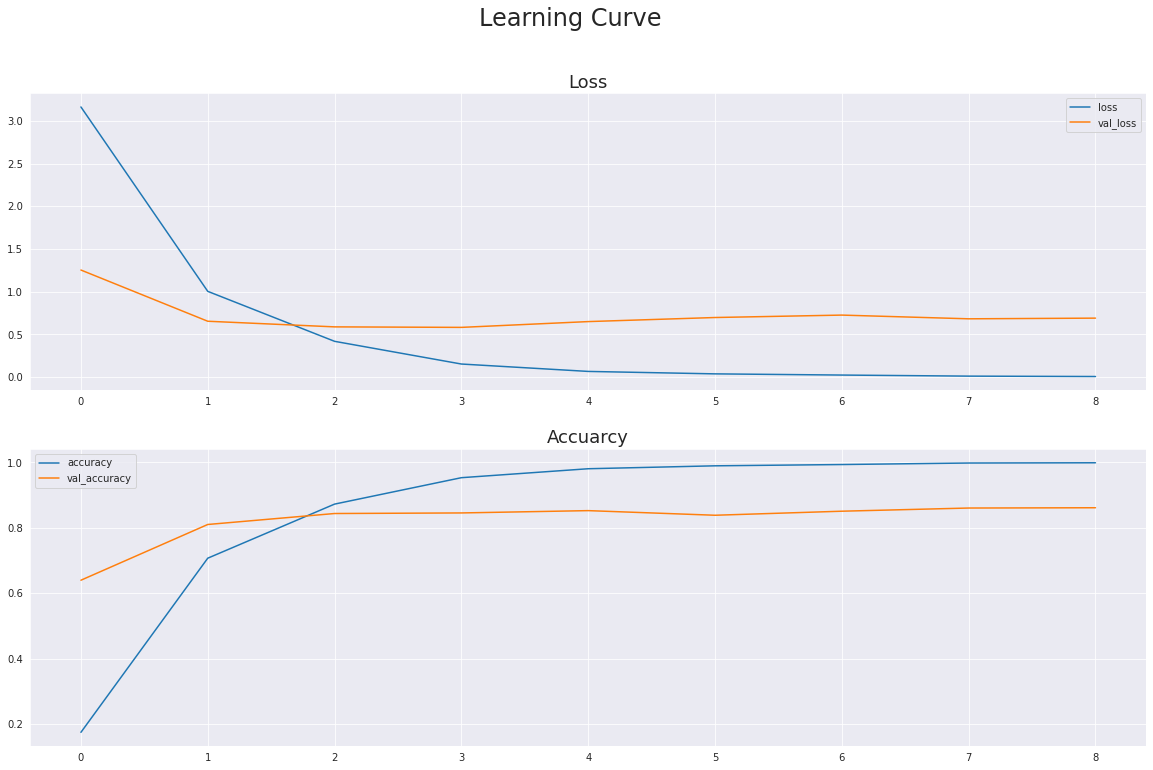

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

history = pd.DataFrame(history.history)
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
fig.suptitle('Learning Curve', fontsize=24)
history[['loss', 'val_loss']].plot(ax=ax[0])
history[['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].set_title('Loss', fontsize=18)
ax[1].set_title('Accuarcy', fontsize=18);

In [48]:
# Save model 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
model.save('/content/drive/MyDrive/fourthbrain/Week-11/transformer_from_scratch')

# Task 3. Fine-tune pre-trained model via 🤗

Substantial gains can be achieved by pre-training on a large corpus of text followed by fine-tuning a specific task. In this task, we will take advantage of [DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter](https://arxiv.org/pdf/1910.01108.pdf), [`distillbert-uncased`](https://huggingface.co/distilbert-base-uncased) specifically, and fine-tune it on the 20 Newsgroups dataset.

1. Install [`Transformers`](https://huggingface.co/docs/transformers) and [`datasets`](https://huggingface.co/docs/datasets/index).

In [50]:
! pip install -U -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.9 MB/s eta 0:00:00


1. Import the library and check its version.


In [51]:
import transformers
print(transformers.__version__)

4.25.1


1. Create `Dataset` objects for train / validation / test sets that are better compatible with the `Transformers` API.

    You can first create a `pd.DataFrame` with two fields: `text` and `label` with `data` and `target` from `train`. Then, call the `Dataset.from_pandas()` method to create a `Dataset` object and save it to `train_ds`. 

    Do the same for test set. 

In [52]:
from datasets import Dataset
train_ds = Dataset.from_pandas(pd.DataFrame({'text': train['data'], 'label': train['target']}))
test_ds  = Dataset.from_pandas(pd.DataFrame({'text': test['data'], 'label': test['target']}))

1. Cast column `label` as `datasets.features.ClassLabel` object using [`class_encode_column`](https://huggingface.co/docs/datasets/package_reference/main_classes#datasets.Dataset.class_encode_column) for both `train_ds` and `test_ds`.

In [53]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

In [54]:
train_ds = train_ds.class_encode_column('label') 
test_ds = test_ds.class_encode_column('label') 

Stringifying the column:   0%|          | 0/12 [00:00<?, ?ba/s]

Casting to class labels:   0%|          | 0/12 [00:00<?, ?ba/s]

Stringifying the column:   0%|          | 0/8 [00:00<?, ?ba/s]

Casting to class labels:   0%|          | 0/8 [00:00<?, ?ba/s]

In [55]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9'], id=None)}

1. Create the validation set by apply [`train_ds.train_test_split()`](https://huggingface.co/docs/datasets/package_reference/main_classes#datasets.Dataset.train_test_split). Similarly, set the test size to 0.1, and set the random state to 19. Make sure the split is stratified by column `label`. Save the result to `train_dsd` as the result is a DatasetDict object.

    Here's another way to do train / validation / test split: [ref](https://discuss.huggingface.co/t/how-to-split-main-dataset-into-train-dev-test-as-datasetdict/1090/2)

In [56]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 11314
})

In [57]:
train_dsd = train_ds.train_test_split(test_size=0.1, seed=19, stratify_by_column='label')

In [58]:
train_dsd

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10182
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1132
    })
})

1. Yet the 'test' set inside `train_dsd` is meant for validation, the following code will rename the test set to validation and add a new DataSet object for the test set.

In [59]:
train_dsd['validation'] = train_dsd['test']
train_dsd['test'] = test_ds

In [60]:
train_dsd

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10182
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7532
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1132
    })
})

1. Load the DistilBERT tokenizer to process the text. 
    
    Use [`AutoTokenizer`](https://huggingface.co/docs/transformers/v4.20.1/en/model_doc/auto#transformers.AutoTokenizer) to load the tokenizer for the given `model_checkpoint`. 

In [61]:
from transformers import AutoTokenizer
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

1. Create a preprocessing function to tokenize text, truncate and pad sequences to be no longer than DistilBERT’s maximum input length:

In [62]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=MAX_LEN)

1. Use 🤗 Datasets [map](https://huggingface.co/docs/datasets/package_reference/main_classes#datasets.Dataset.map) function to apply the preprocessing function over the entire dataset. You can speed up the map function by setting `batched=True` to process multiple elements of the dataset at once:

In [63]:
tokenized_text = train_dsd.map(preprocess_function)

  0%|          | 0/10182 [00:00<?, ?ex/s]

  0%|          | 0/7532 [00:00<?, ?ex/s]

  0%|          | 0/1132 [00:00<?, ?ex/s]

In [64]:
tokenized_text

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10182
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 7532
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1132
    })
})

In [66]:
import numpy as np
#For self attention we look at all inputs - so attention mask is all 1's 
np.sum(tokenized_text['train']['attention_mask'][0]) 

256

1. Use [DataCollatorWithPadding](https://huggingface.co/docs/transformers/v4.20.1/en/main_classes/data_collator#transformers.DataCollatorWithPadding) to create a batch of examples. Set the type of Tensor to return as 'tf' as we will fine-tune the model in TensorFlow.

In [67]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors='tf')

1. To fine-tune a model in TensorFlow, start by converting datasets to the `tf.data.Dataset` format with `to_tf_dataset`. 

    Specify inputs and labels in columns, whether to shuffle the dataset order, batch size, and the data collator:

In [68]:
tokenized_text['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 10182
})

In [69]:
list(tokenized_text['train'].features.keys())

['text', 'label', 'input_ids', 'attention_mask']

In [70]:
type(tokenized_text['train'])

datasets.arrow_dataset.Dataset

In [71]:
BATCH_SIZE = 16

tf_train_set = tokenized_text['train'].to_tf_dataset(
    columns=['input_ids', 'attention_mask', 'labels'],
    shuffle=True,
    batch_size=BATCH_SIZE,
    collate_fn=data_collator,
)
tf_validation_set = tokenized_text['validation'].to_tf_dataset(
    columns=['input_ids', 'attention_mask', 'labels'],
    shuffle=True, 
    batch_size=BATCH_SIZE,
    collate_fn=data_collator,
    )
tf_test_set = tokenized_text['test'].to_tf_dataset(
    columns=['input_ids', 'attention_mask', 'labels'],
    shuffle=True, 
    batch_size=BATCH_SIZE,
    collate_fn=data_collator,
    )

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1. Set up an optimizer function, learning rate schedule, and some training hyperparameters:

In [72]:
from transformers import create_optimizer

EPOCHS = 5
batches_per_epoch = len(tokenized_text["train"]) // BATCH_SIZE
total_train_steps = int(batches_per_epoch * EPOCHS)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

1. Load DistilBERT with  [TFAutoModelForSequenceClassification](https://huggingface.co/docs/transformers/v4.20.1/en/model_doc/auto#transformers.TFAutoModelForSequenceClassification) along with the number of expected labels:

In [73]:
from transformers import TFAutoModelForSequenceClassification

my_bert = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=NUM_LABELS)

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_21', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

1. Don't forget to configure the model for training with [`compile`](https://keras.io/api/models/model_training_apis/#compile-method):

In [74]:
my_bert.compile(optimizer=optimizer,  metrics=['accuracy'])

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


1. Finally, let the fine-tuning start!

    You may run into CoLab's usage limit, feel free to lower the parameter `epochs` to 3; even so, it could take ~10 minutes. 

In [75]:
%%time
my_bert.fit(
    x=tf_train_set, 
    validation_data=tf_validation_set,
    epochs=3
)

Epoch 1/3
637/637 [==============================] - 292s 443ms/step - loss: 1.3399 - accuracy: 0.6596 - val_loss: 0.6156 - val_accuracy: 0.8163
Epoch 2/3
637/637 [==============================] - 283s 444ms/step - loss: 0.4307 - accuracy: 0.8819 - val_loss: 0.3862 - val_accuracy: 0.8825
Epoch 3/3
637/637 [==============================] - 281s 441ms/step - loss: 0.2313 - accuracy: 0.9401 - val_loss: 0.3252 - val_accuracy: 0.9046
CPU times: user 10min 8s, sys: 18.8 s, total: 10min 27s
Wall time: 15min 35s


1. As you are waiting for the fine-tuning to finish, how many parameters does DistilBERT have? How about BERT? What is the world's largest open Multilingual Language Model as of July 2022? (hint: 🌸) 

    According to [HuggingFace](https://huggingface.co/transformers/v2.9.1/pretrained_models.html), bert-base-uncased is 110M parameters and distilbert-base-uncased is 66M parameters. The largest MLM is [Bloom](https://bigscience.huggingface.co/blog/bloom) with 176B parameters! Our transformer model from scratch was around 3M parameters!

1. Evaluate the model on the test data. 
    
    Use `evaluate` to evaluate the model on the test data (accuracy shall be around 0.84).

In [76]:
bert_loss, bert_acc = my_bert.evaluate(tf_test_set) 

471/471 [==============================] - 70s 148ms/step - loss: 0.5611 - accuracy: 0.8390


1. Optional. If you are happy with the result, you can save the model to a file. 
    
    One easy way to do it is to use [`save_pretrained()`](https://huggingface.co/docs/transformers/main_classes/model#transformers.PreTrainedModel.save_pretrained) to save the model to a file. Check [Export 🤗 Transformers Models](https://huggingface.co/docs/transformers/serialization) for deployment options.

In [77]:
tokenizer.save_pretrained("/content/drive/MyDrive/fourthbrain/Week-11/local-tf-checkpoint")
my_bert.save_pretrained("/content/drive/MyDrive/fourthbrain/Week-11/local-tf-checkpoint")

# Acknowledgement & Reference

- Part of the notebook is adapted from [Text Classification - Attention](https://www.kaggle.com/code/ritvik1909/text-classification-attention)
- Part of the notebook is adapted from [Fine-tune a pretrained model with Hugging Face](https://huggingface.co/docs/transformers/training)
- We used accuracy for metric, check out [Comprehensive Guide to Multiclass Classification Metrics](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd).
- [BERT Explained: State of the art language model for NLP](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270)
- [Hugging Face: State-of-the-Art Natural Language Processing in ten lines of TensorFlow 2.0](https://medium.com/tensorflow/using-tensorflow-2-for-state-of-the-art-natural-language-processing-102445cda54a)
- More readings on Transformers, check the Course Materials section on [CS25: Transformers United](https://web.stanford.edu/class/cs25/)


## Answers to Rubrics Questions

#### Algorithm Understanding
In the transformer architecture in the paper "Attention Is All You Need", how does Multi-head Attention work?

The purpose of the Multihead attention is to attend to the most import parts of the input. 

For e.g. in this sentence - "She tossed a tennis ball to serve" - when processing the "ball" we need to pay attention to "tennis" and "tossed". 

The mechanics of the Multihead attention layer is below: 


The multihead attention layer takes in the input sentence as position embeddings - this is the token embedding added with the position information of the token in the sequence. The layer consists of 4 consecutive levels: 

1.   3 linear dense layers that each recieve the position embeddings of the input text sequence of as a Query, Key or Value. 
2.   Scaled dot product attention function that combines Query, Key, Value. 
The output of the step 2 is the input embedding weighted by the attention output. Levels 1 & 2 are repeated for each head in the layer. In our case, we have 2 heads. So we will have 2 outputs. 
3. A concatenation operation that combines the outputs from all the heads, in our case 2.
4. A final linear dense layer that produces the output. 

The weights in each of these layers in level 1 and 4 is learnt during training. All of this implemented by the MultiHeadAttention layer in keras. 

#### Interview Readiness
What is the main idea behind Positional Encoding?

In transformers, since the entire text sequence is processed together and not one word at a time, the position of the word is lost. Position encoding is used to retain the position information. 

Position encoding adds the position information of the token in the sequence to the word embedding. The encoding is designed to work for any length of input sequence. This is achieved by using the sine/cosine transformations on the position values. Sine functions are used to provide the encoding for odd locations, and cosine functions are used for even locations. 

The position embedding is of the same size as the word embedding. And it is simply added to the word embedding to get the final position encoding output.

What is EarlyStopping and why do we use it?

The purpose of model training is to reduce the training and validation loss. Once the loss has flattened (i.e. it does not vary too much) there is no need to continue training. EarlyStopping lets us monitor the loss and stop early when we determine there is no much change in the loss. We can specify the `patience` parameter to set the number epochs we should "patiently wait" to determine there is no more change in the loss value. 

How would explain what a transformer model is to business stakeholders (at a high level)?

The transformer model is a type of deep learning model that has been very effective on sequential data. It is able to process input sequences of varying lengths and generate output sequences also of varying lengths. So, it has found applications in natural language processing such as language translation, text summarisation, and text generation for dialogue. 

Essentially the transformer model is able to understand language and generate text in the language. It is possible to train these models on the large corpus of text data on the internet, and then apply to them to tasks that need to process large volume of text in the business - such as customer reviews, social media posts etc. From this we can extract insights such as customer sentiment, topics of interest trending in social media etc. These insights can guide efforts to improve customer service in an effective manner by targetting on most important issues. 

Transformer models can be run on parallel hardware and so we can achieve the above tasks faster than the older sequence models. 